In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

from networkx.readwrite import json_graph
import json

import pandas

import copy
import random
import csv

import seaborn as sns

In [145]:
nx.__version__

'3.4.2'

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import and Generate Networks

In [147]:
# MHO
adjmat_MHO  = pd.read_csv("/content/drive/MyDrive/CRCT/MHOxAI4FOOD/MPA3xTODOSxMHO/networkFiles/mho_edges.csv")
adjmat_MHO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

# MHNO
adjmat_MHNO  = pd.read_csv("/content/drive/MyDrive/CRCT/MHOxAI4FOOD/MPA3xTODOSxMHO/networkFiles/mhno_edges.csv")
adjmat_MHNO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

# MUO
adjmat_MUO  = pd.read_csv("/content/drive/MyDrive/CRCT/MHOxAI4FOOD/MPA3xTODOSxMHO/networkFiles/muo_edges.csv")
adjmat_MUO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

# MUNO
adjmat_MUNO  = pd.read_csv("/content/drive/MyDrive/CRCT/MHOxAI4FOOD/MPA3xTODOSxMHO/networkFiles/muno_edges.csv")
adjmat_MUNO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

In [148]:
# add metadata:
# MHO
metadata_MHO  = pd.read_csv("/content/drive/MyDrive/CRCT/MHOxAI4FOOD/MPA3xTODOSxMHO/networkFiles/mho_metadata.csv")
metadata_MHO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

# MHNO
metadata_MHNO  = pd.read_csv("/content/drive/MyDrive/CRCT/MHOxAI4FOOD/MPA3xTODOSxMHO/networkFiles/mhno_metadata.csv")
metadata_MHNO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

# MUO
metadata_MUO  = pd.read_csv("/content/drive/MyDrive/CRCT/MHOxAI4FOOD/MPA3xTODOSxMHO/networkFiles/muo_metadata.csv")
metadata_MUO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

# MUNO
metadata_MUNO  = pd.read_csv("/content/drive/MyDrive/CRCT/MHOxAI4FOOD/MPA3xTODOSxMHO/networkFiles/muno_metadata.csv")
metadata_MUNO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

Añadir abundancia como atributo:

In [149]:
def add_abundance(net, metadata):
  # Crear un diccionario donde la clave sea el nombre del nodo y el valor sea el valor de 'Abundance'
  abundance_dict = pd.Series(metadata.Abundance.values, index=metadata.Label).to_dict()
  # Asignar el atributo 'Abundance' a los nodos
  nx.set_node_attributes(net, abundance_dict, 'Abundance')

In [150]:
adjmat_MHO

,Source,Target,Weight,Type,Sign
0,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactob...,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,0.045277,Undirected,Positive
1,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactob...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactob...,0.028090,Undirected,Positive
2,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactob...,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,0.676011,Undirected,Positive
3,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactob...,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,-0.000251,Undirected,Negative
4,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,k__Bacteria|p__Synergistetes|c__Synergistia|o_...,0.093875,Undirected,Positive
...,...,...,...,...,...
795,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,0.578992,Undirected,Positive
796,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,k__Bacteria|p__Firmicutes|c__Erysipelotrichia|...,0.027083,Undirected,Positive
797,k__Bacteria|p__Actinobacteria|c__Coriobacterii...,k__Bacteria|p__Actinobacteria|c__Coriobacterii...,0.206711,Undirected,Positive
798,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o_...,k__Bacteria|p__Firmicutes|c__Erysipelotrichia|...,0.145685,Undirected,Positive


In [151]:
def create_net(adjmat):
  # Create an empty graph
  tmpG= nx.Graph()

  # Iterate over the rows and columns of the DataFrame to add edges with weights
  for row in range(len(adjmat)):
    # print(adjmat.iloc[row, 0])
    source = adjmat.iloc[row, 0]
    target = adjmat.iloc[row, 1]
    weight = adjmat.iloc[row, 2]
    # Add nodes and edge to the graph
    tmpG.add_edge(source, target, weight=weight)

    # Skip diagonal and zero-weight edges
    if source != target and weight != 0:
        tmpG.add_edge(source, target,
                      weight=weight,
                      invWeight = 1 - weight)
  return(tmpG)

In [152]:
MHO = create_net(adjmat_MHO)
MHNO = create_net(adjmat_MHNO)
MUO = create_net(adjmat_MUO)
MUNO = create_net(adjmat_MUNO)

In [153]:
add_abundance(MHO, metadata_MHO)
add_abundance(MHNO, metadata_MHNO)
add_abundance(MUO, metadata_MUO)
add_abundance(MUNO, metadata_MUNO)

In [154]:
for net in (MHO, MHNO, MUO, MUNO):
  print(net.order(), net.size())

289 800
340 976
326 683
334 760


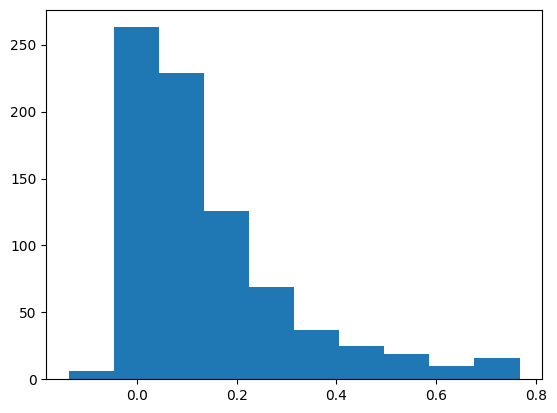

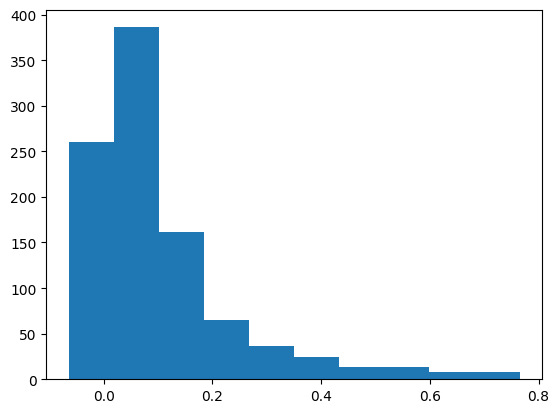

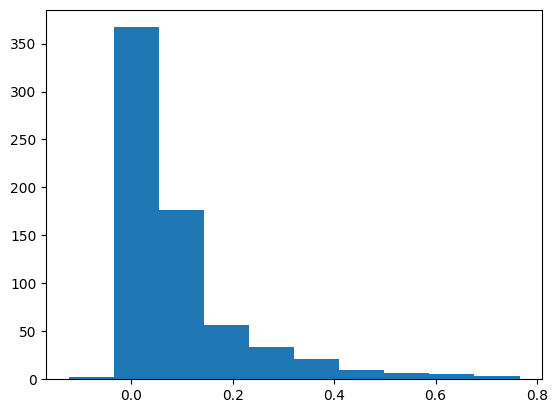

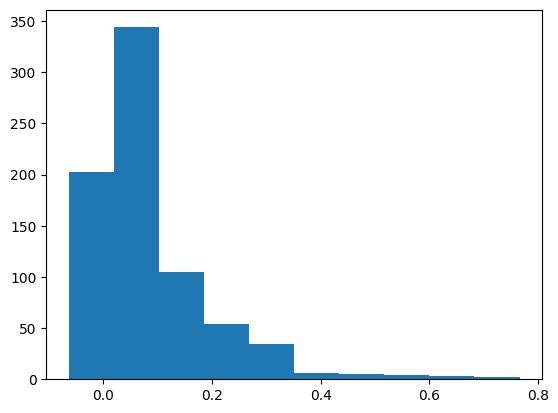

In [155]:
for net in (MHO, MHNO, MUO, MUNO):
  weights_net = {}
  for source, target, data in net.edges(data=True):
      weights_net[(source, target)] =  data['weight']
  plt.hist(weights_net.values())
  plt.show()

Chequeamos que `invWeight` existe de verdad:

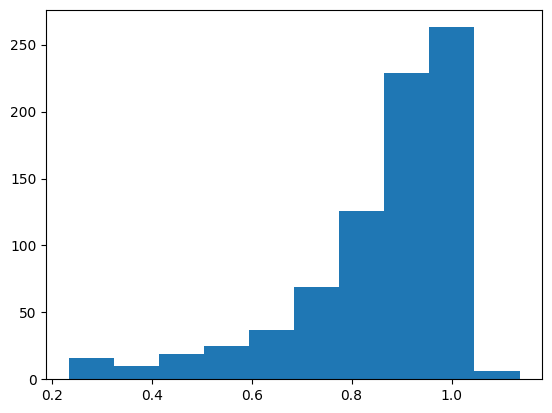

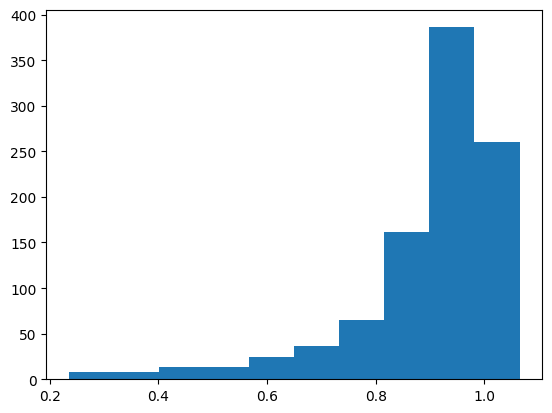

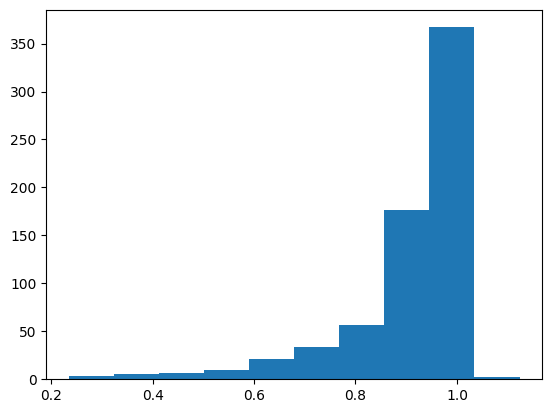

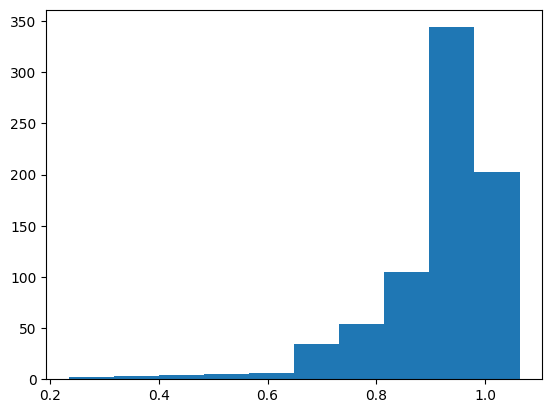

In [156]:
for net in (MHO, MHNO, MUO, MUNO):
  weights_net = {}
  for source, target, data in net.edges(data=True):
      weights_net[(source, target)] =  data['invWeight']
  plt.hist(weights_net.values())
  plt.show()

Ambos son conexos:

In [157]:
for net in (MHO, MHNO, MUO, MUNO):
  print('Connected graph:', nx.is_connected(net))

Connected graph: True
Connected graph: True
Connected graph: False
Connected graph: False


In [158]:
def get_connected_graph(net):
  # Get a list of connected components
  components = list(nx.connected_components(net))
  # Find the largest connected component
  largest_component = max(components, key=len)
  # Create a new graph containing only the largest component
  net_largest = net.subgraph(largest_component)
  print('Connected graph:', nx.is_connected(net_largest))
  return(net_largest)


MHO = get_connected_graph(MHO)
MHNO = get_connected_graph(MHNO)
MUO = get_connected_graph(MUO)
MUNO = get_connected_graph(MUNO)

Connected graph: True
Connected graph: True
Connected graph: True
Connected graph: True


In [159]:
def get_pos_neg_edges(net):
  pos_edges_net, neg_edges_net = [], []
  for edge in net.edges(data = True):
    if edge[-1]['weight'] > 0:
      pos_edges_net.append(edge[-1]['weight'])
    else:
      neg_edges_net.append(edge[-1]['weight'])
  print('% positive edge: {0}\n% negative edges: {1}'.
      format(100 * len(pos_edges_net)/net.size(),
             100 * len(neg_edges_net)/net.size()))

print("######### MHO #########")
get_pos_neg_edges(MHO)
print("######### MHNO #########")
get_pos_neg_edges(MHNO)
print("######### MUO #########")
get_pos_neg_edges(MUO)
print("######### MUNO #########")
get_pos_neg_edges(MUNO)

######### MHO #########
% positive edge: 92.875
% negative edges: 7.125
######### MHNO #########
% positive edge: 98.56557377049181
% negative edges: 1.4344262295081966
######### MUO #########
% positive edge: 98.08541973490428
% negative edges: 1.914580265095729
######### MUNO #########
% positive edge: 98.81422924901186
% negative edges: 1.1857707509881423


In [160]:
def get_basic_properties(net):
  print('Number of nodes: {0} \nNumber of edges: {1}'
  .format(net.order(), net.size()))
  print('Graph density: {0}'.format(nx.density(net)))

print("MHO #############"); get_basic_properties(MHO)
print("MHNO ############"); get_basic_properties(MHNO)
print("MUO #############"); get_basic_properties(MUO)
print("MUNO ############"); get_basic_properties(MUNO)

MHO #############
Number of nodes: 289 
Number of edges: 800
Graph density: 0.019223375624759707
MHNO ############
Number of nodes: 340 
Number of edges: 976
Graph density: 0.01693562380704494
MUO #############
Number of nodes: 319 
Number of edges: 679
Graph density: 0.013386960036276888
MUNO ############
Number of nodes: 332 
Number of edges: 759
Graph density: 0.013813562406726604


In [161]:
MHO_names = list(MHO.nodes())
MHNO_names = list(MHNO.nodes())
MUO_names = list(MUO.nodes())
MUNO_names = list(MUNO.nodes())

# Node Degree Distribution

In [162]:
mho_col = "#2a9d8f"
mhno_col = "#264653"
muo_col = "#edafb8"
muno_col = "#703d67"


netdict = {"MHO" : {"color" : mho_col, "name" : "MHO", "net" : MHO},
           "MHNO" : {"color" : mhno_col, "name" : "MHNO", "net" : MHNO},
           "MUO" : {"color" : muo_col, "name" : "MUO", "net" : MUO},
           "MUNO" : {"color" : muno_col, "name" : "MUNO", "net" : MUNO}}

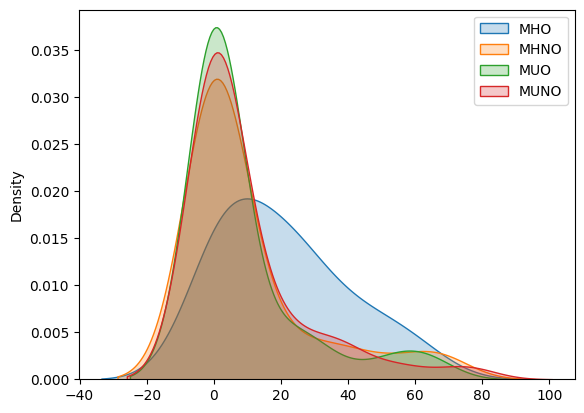

In [163]:
histdeg_MHO = nx.degree_histogram(MHO)
histdeg_MHNO = nx.degree_histogram(MHNO)
histdeg_MUO = nx.degree_histogram(MUO)
histdeg_MUNO = nx.degree_histogram(MUNO)


fig = sns.kdeplot(histdeg_MHO, fill=True, label = "MHO")
fig = sns.kdeplot(histdeg_MHNO, fill=True, label = "MHNO")
fig = sns.kdeplot(histdeg_MUO, fill=True, label = "MUO")
fig = sns.kdeplot(histdeg_MUNO, fill=True, label = "MUNO")
plt.legend()
plt.show()

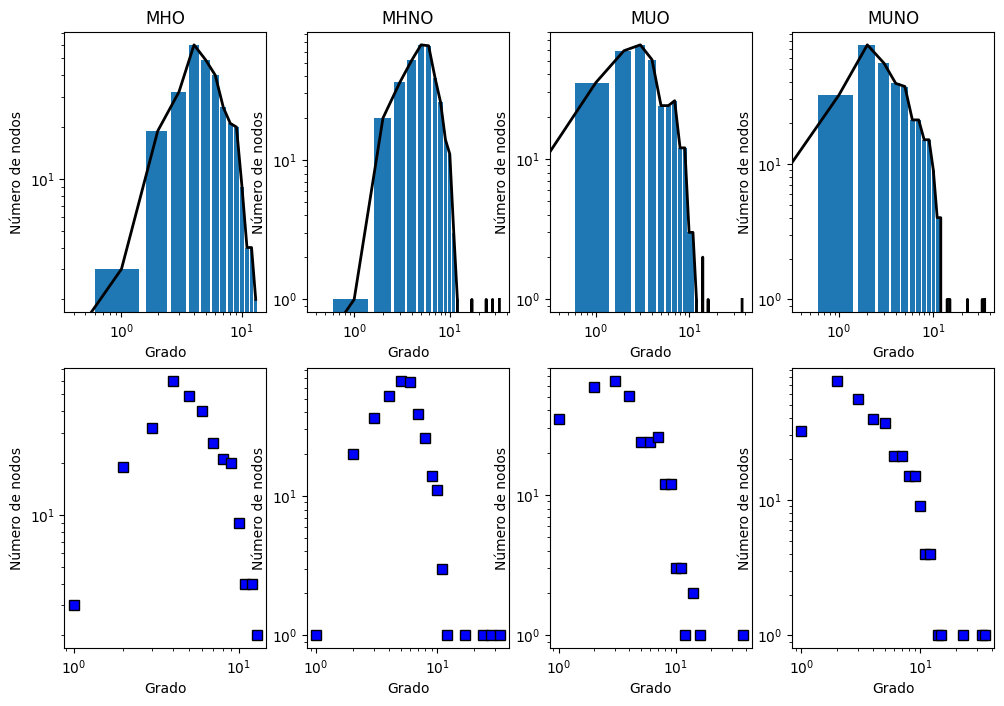

In [164]:
def plot_degree(net, plottitle, hist = True):
  histdeg = nx.degree_histogram(net)

  if hist:
    plt.bar(range(len(histdeg)), histdeg, width=0.80)
    plt.plot(range(len(histdeg)), histdeg, c = 'k', lw = 2)
    plt.title(plottitle)
  else:
    plt.plot(histdeg, 'ms',
             markeredgecolor='k', markerfacecolor='b', markersize=7)
  plt.xscale("log", nonpositive='clip')
  plt.yscale("log", nonpositive='clip')
  plt.ylabel("Número de nodos")
  plt.xlabel("Grado")

plt.figure(figsize=(12, 8))
plt.subplot(2, 4, 1)
plot_degree(MHO, "MHO",  hist = True)
plt.subplot(2, 4, 5)
plot_degree(MHO, "MHO",  hist = False)

plt.subplot(2, 4, 2)
plot_degree(MHNO, "MHNO",  hist = True)
plt.subplot(2, 4, 6)
plot_degree(MHNO, "MHNO",  hist = False)

plt.subplot(2, 4, 3)
plot_degree(MUO, "MUO",  hist = True)
plt.subplot(2, 4, 7)
plot_degree(MUO, "MUO",  hist = False)

plt.subplot(2, 4, 4)
plot_degree(MUNO, "MUNO", True)
plt.subplot(2, 4, 8)
plot_degree(MUNO, "MUNO", False)

In [165]:
# def plot_degree(net, plottitle, hist = True):
#   histdeg = nx.degree_histogram(net)

#   if hist:
#     plt.bar(range(len(histdeg)), histdeg, width=0.80)
#     plt.plot(range(len(histdeg)), histdeg, c = 'k', lw = 2)
#     plt.title(plottitle)
#   else:
#     plt.plot(histdeg, 'ms',
#              markeredgecolor='k', markerfacecolor='b', markersize=7)
#   # plt.xscale("log", nonpositive='clip')
#   # plt.yscale("log", nonpositive='clip')
#   plt.ylabel("Número de nodos")
#   plt.xlabel("Grado")

# plt.figure(figsize=(15, 8))
# plt.subplot(2, 4, 1)
# plot_degree(MHO, "MHO",  hist = True)
# plt.subplot(2, 4, 5)
# plot_degree(MHO, "MHO",  hist = False)

# plt.subplot(2, 4, 2)
# plot_degree(MHNO, "MHNO",  hist = True)
# plt.subplot(2, 4, 6)
# plot_degree(MHNO, "MHNO",  hist = False)

# plt.subplot(2, 4, 3)
# plot_degree(MUO, "MUO",  hist = True)
# plt.subplot(2, 4, 7)
# plot_degree(MUO, "MUO",  hist = False)

# plt.subplot(2, 4, 4)
# plot_degree(MUNO, "MUNO", True)
# plt.subplot(2, 4, 8)
# plot_degree(MUNO, "MUNO", False)

In [166]:
meandegMHO = sum([i[1] for i in MHO.degree])/MHO.order()
meandegMHNO = sum([i[1] for i in MHNO.degree])/MHNO.order()
meandegMUO = sum([i[1] for i in MUO.degree])/MUO.order()
meandegMUNO = sum([i[1] for i in MUNO.degree])/MUNO.order()
print(meandegMHO, meandegMHNO, meandegMUO, meandegMUNO)

5.536332179930795 5.741176470588235 4.25705329153605 4.572289156626506


 In case you are using weights, follow [this example](https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree_histogram.html) from networkX documentation:

In [167]:
import collections

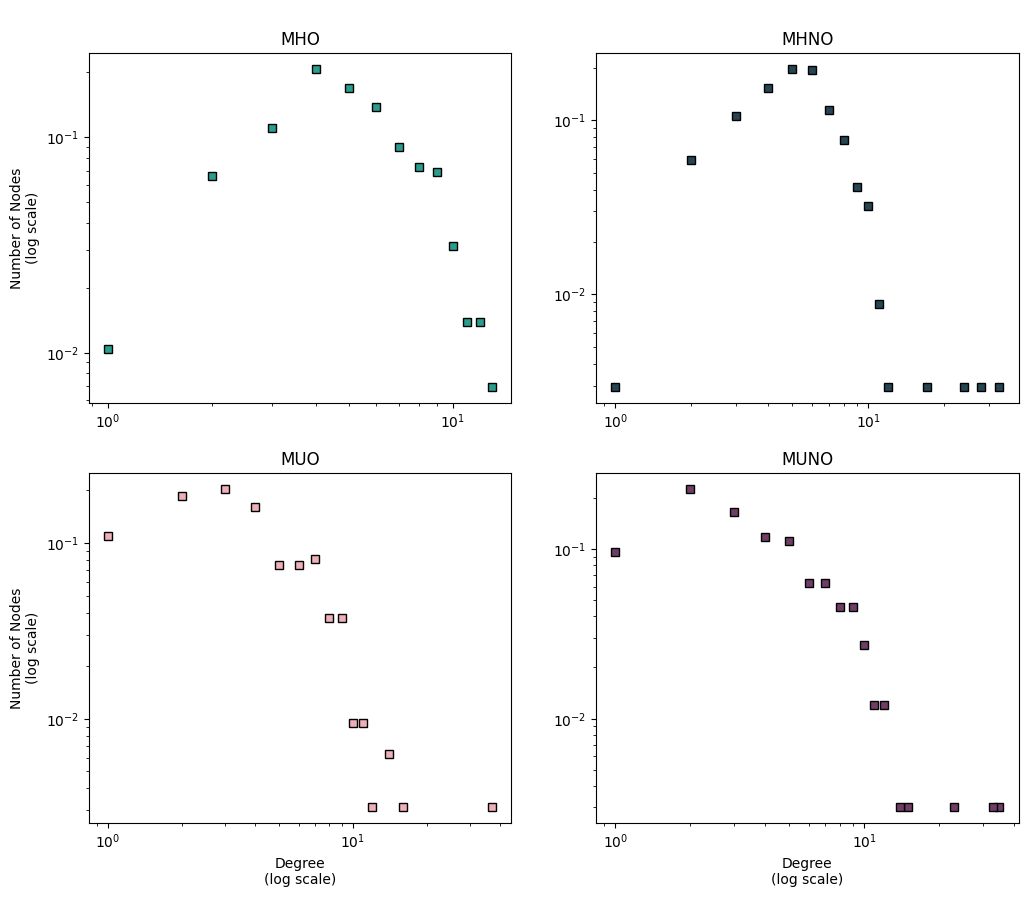

In [168]:
def plot_degree_histogram(g, normalized=True, weight=None):

    degree_sequence = sorted([d for n, d in g.degree(weight=weight)], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    aux_x, aux_y = zip(*degreeCount.items())

    n_nodes = g.number_of_nodes()
    aux_y = list(aux_y)
    if normalized:
        for i in range(len(aux_y)):
            aux_y[i] = aux_y[i]/n_nodes

    return aux_x, aux_y


plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
aux_x, aux_y = plot_degree_histogram(MHO)
plt.title('\nMHO')
plt.xlabel('')
plt.ylabel('Number of Nodes\n(log scale)')
plt.xscale("log")
plt.yscale("log")
plt.plot(aux_x, aux_y, 'ms',
             markeredgecolor='k', markerfacecolor=mho_col)

plt.subplot(2, 2, 2)
aux_x, aux_y = plot_degree_histogram(MHNO)
plt.title('\nMHNO')
plt.xlabel('')
plt.ylabel('')
plt.xscale("log")
plt.yscale("log")
plt.plot(aux_x, aux_y, 'ms',
             markeredgecolor='k', markerfacecolor=mhno_col)

plt.subplot(2, 2, 3)
aux_x, aux_y = plot_degree_histogram(MUO)
plt.title('\nMUO')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Number of Nodes\n(log scale)')
plt.xscale("log")
plt.yscale("log")
plt.plot(aux_x, aux_y, 'ms',
             markeredgecolor='k', markerfacecolor=muo_col)

plt.subplot(2, 2, 4)
aux_x, aux_y = plot_degree_histogram(MUNO)
plt.title('\nMUNO')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('')
plt.xscale("log")
plt.yscale("log")
plt.plot(aux_x, aux_y, 'ms',
             markeredgecolor='k', markerfacecolor=muno_col)



plt.show()

# Node Betweenness Values and Distribution

In [169]:
def get_betw(G):
  dc = nx.degree_centrality(G)
  clsness = nx.closeness_centrality(G)
  btwness_G = nx.betweenness_centrality(G, weight="invWeight")

  print('Centrality (mean):', sum(dc.values())/len(dc))
  print('Closeness (mean):', sum(clsness.values())/len(clsness))
  print('Betweenness (mean):', sum(btwness_G.values())/len(btwness_G))
  return(dc, clsness, btwness_G)

In [170]:
print("MHNO ###########################")
netdict["MHNO"]["centrality"], netdict["MHNO"]["closeness"], netdict["MHNO"]["betweenness"] = get_betw(MHNO)
print("MHO ###########################")
netdict["MHO"]["centrality"], netdict["MHO"]["closeness"], netdict["MHO"]["betweenness"] = get_betw(MHO)
print("MUNO ###########################")
netdict["MUNO"]["centrality"], netdict["MUNO"]["closeness"], netdict["MUNO"]["betweenness"] = get_betw(MUNO)
print("MUO ###########################")
netdict["MUO"]["centrality"], netdict["MUO"]["closeness"], netdict["MUO"]["betweenness"] = get_betw(MUO)

MHNO ###########################
Centrality (mean): 0.01693562380704493
Closeness (mean): 0.25833779826511893
Betweenness (mean): 0.008663664449913597
MHO ###########################
Centrality (mean): 0.019223375624759724
Closeness (mean): 0.2466502923744123
Betweenness (mean): 0.011196946497393785
MUNO ###########################
Centrality (mean): 0.013813562406726642
Closeness (mean): 0.22244194746343451
Betweenness (mean): 0.01105526197070623
MUO ###########################
Centrality (mean): 0.013386960036276915
Closeness (mean): 0.21168131438908902
Betweenness (mean): 0.01221801185268056


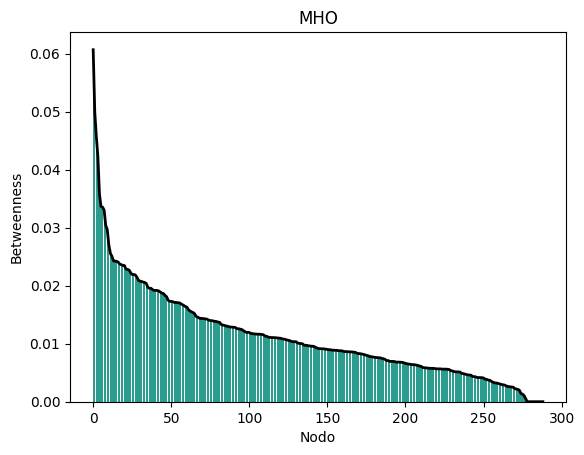

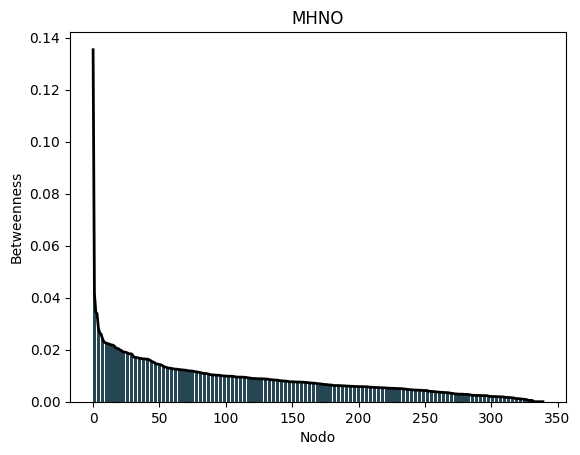

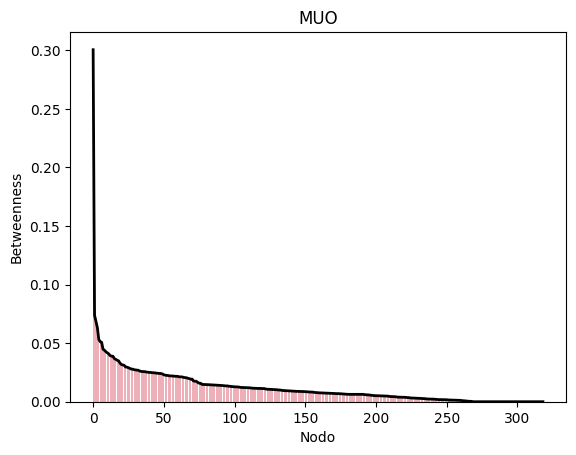

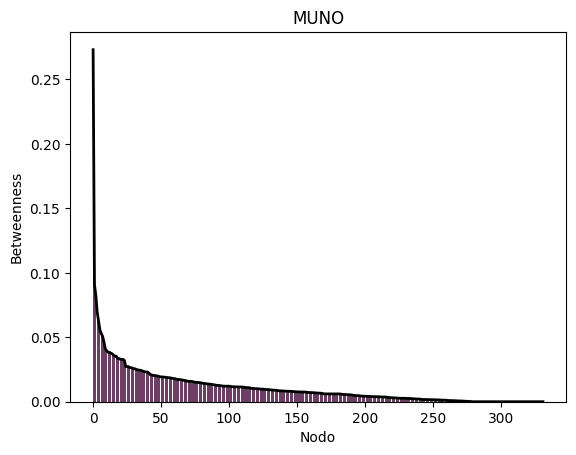

In [171]:
for net in netdict:
  btwness_G = netdict[net]["betweenness"]
  col = netdict[net]["color"]
  plt.bar(range(len(btwness_G)), sorted(btwness_G.values(), reverse = True), width=0.80, color=col)
  plt.plot(range(len(btwness_G)), sorted(btwness_G.values(), reverse = True), c = 'k', lw = 2)
  plt.xlabel("Nodo")
  plt.ylabel("Betweenness")
  plt.title(net)
  plt.show();

In [172]:
names = ["MHO", "MHNO", "MUO", "MUNO"]
for (i,net) in enumerate([MHO, MHNO, MUO, MUNO]):
  print('#### ', names[i], '###################')
  print('Índice de clusterización:', nx.average_clustering(net))#, weight = "invWeight"))
  print('Camino característico:', nx.average_shortest_path_length(net, weight = "invWeight"))
  print('Máximo k con k-core:', max((nx.core_number(net)).values()))

####  MHO ###################
Índice de clusterización: 0.15810433319083853
Camino característico: 3.4214858539284863
Máximo k con k-core: 4
####  MHNO ###################
Índice de clusterización: 0.17002110645596438
Camino característico: 3.4202406832363903
Máximo k con k-core: 5
####  MUO ###################
Índice de clusterización: 0.1468026779155306
Camino característico: 4.305762168063188
Máximo k con k-core: 4
####  MUNO ###################
Índice de clusterización: 0.16204644998246528
Camino característico: 4.151702354379257
Máximo k con k-core: 5


# Exportar cosas a dataframe

In [173]:
redes = {
    "MHNO": MHNO,
    "MHO": MHO,
    "MUNO": MUNO,
    "MUO": MUO
}

# Obtener todos los nodos presentes en alguna red
todos_los_nodos = set().union(*[G.nodes() for G in redes.values()])
print("Total de nodos: ", len(todos_los_nodos))

# Diccionarios para almacenar métricas de cada red
metricas = {}

for nombre_red, G in redes.items():
    metricas[nombre_red] = {
        "grado": dict(G.degree()),
        "betweenness": nx.betweenness_centrality(G),
        "closeness": nx.closeness_centrality(G)
        }

# Crear lista de datos para el DataFrame
data = []

for nodo in todos_los_nodos:
    for nombre_red in redes.keys():
        grado = metricas[nombre_red]["grado"].get(nodo, None)
        betweenness = metricas[nombre_red]["betweenness"].get(nodo, None)
        closeness = metricas[nombre_red]["closeness"].get(nodo, None)

        data.append({
            "nodo": nodo,
            "red": nombre_red,
            "grado": grado,
            "betweenness": betweenness,
            "closeness": closeness
        })

# Crear DataFrame
df = pd.DataFrame(data)

Total de nodos:  355


In [174]:
df.head()

,nodo,red,grado,betweenness,closeness
0,k__Bacteria|p__Firmicutes|c__Erysipelotrichia|...,MHNO,6.0,0.003975,0.258581
1,k__Bacteria|p__Firmicutes|c__Erysipelotrichia|...,MHO,2.0,0.000509,0.227848
2,k__Bacteria|p__Firmicutes|c__Erysipelotrichia|...,MUNO,3.0,0.005707,0.229224
3,k__Bacteria|p__Firmicutes|c__Erysipelotrichia|...,MUO,8.0,0.028609,0.244240
4,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...,MHNO,6.0,0.006945,0.274939


In [175]:
df.to_csv("/content/drive/MyDrive/CRCT/MHOxAI4FOOD/MPA3xTODOSxMHO/networkFiles/network_metrics_paraKW_20250219.csv")

In [ ]:
# Diccionario para almacenar las longitudes de los caminos más cortos
shortest_path_lengths = {}

for nombre_red, G in redes.items():
    # Obtener todas las longitudes de los caminos más cortos
    path_lengths = []
    for nodo_origen, longitudes in dict(nx.shortest_path_length(G, weight = "invWeight")).items():
        path_lengths.extend(longitudes.values())  # Extraer solo las longitudes

    shortest_path_lengths[nombre_red] = path_lengths

In [178]:
with open("/content/drive/MyDrive/CRCT/MHOxAI4FOOD/MPA3xTODOSxMHO/networkFiles/shortest_paths_paraKW_20250219.json", "w") as f:
    json.dump(shortest_path_lengths, f)

# K-Cores

In [ ]:
cores_MHO = nx.core_number(MHO)
cores_MHNO = nx.core_number(MHNO)
cores_MUO = nx.core_number(MUO)
cores_MUNO = nx.core_number(MUNO)

In [ ]:
from collections import Counter

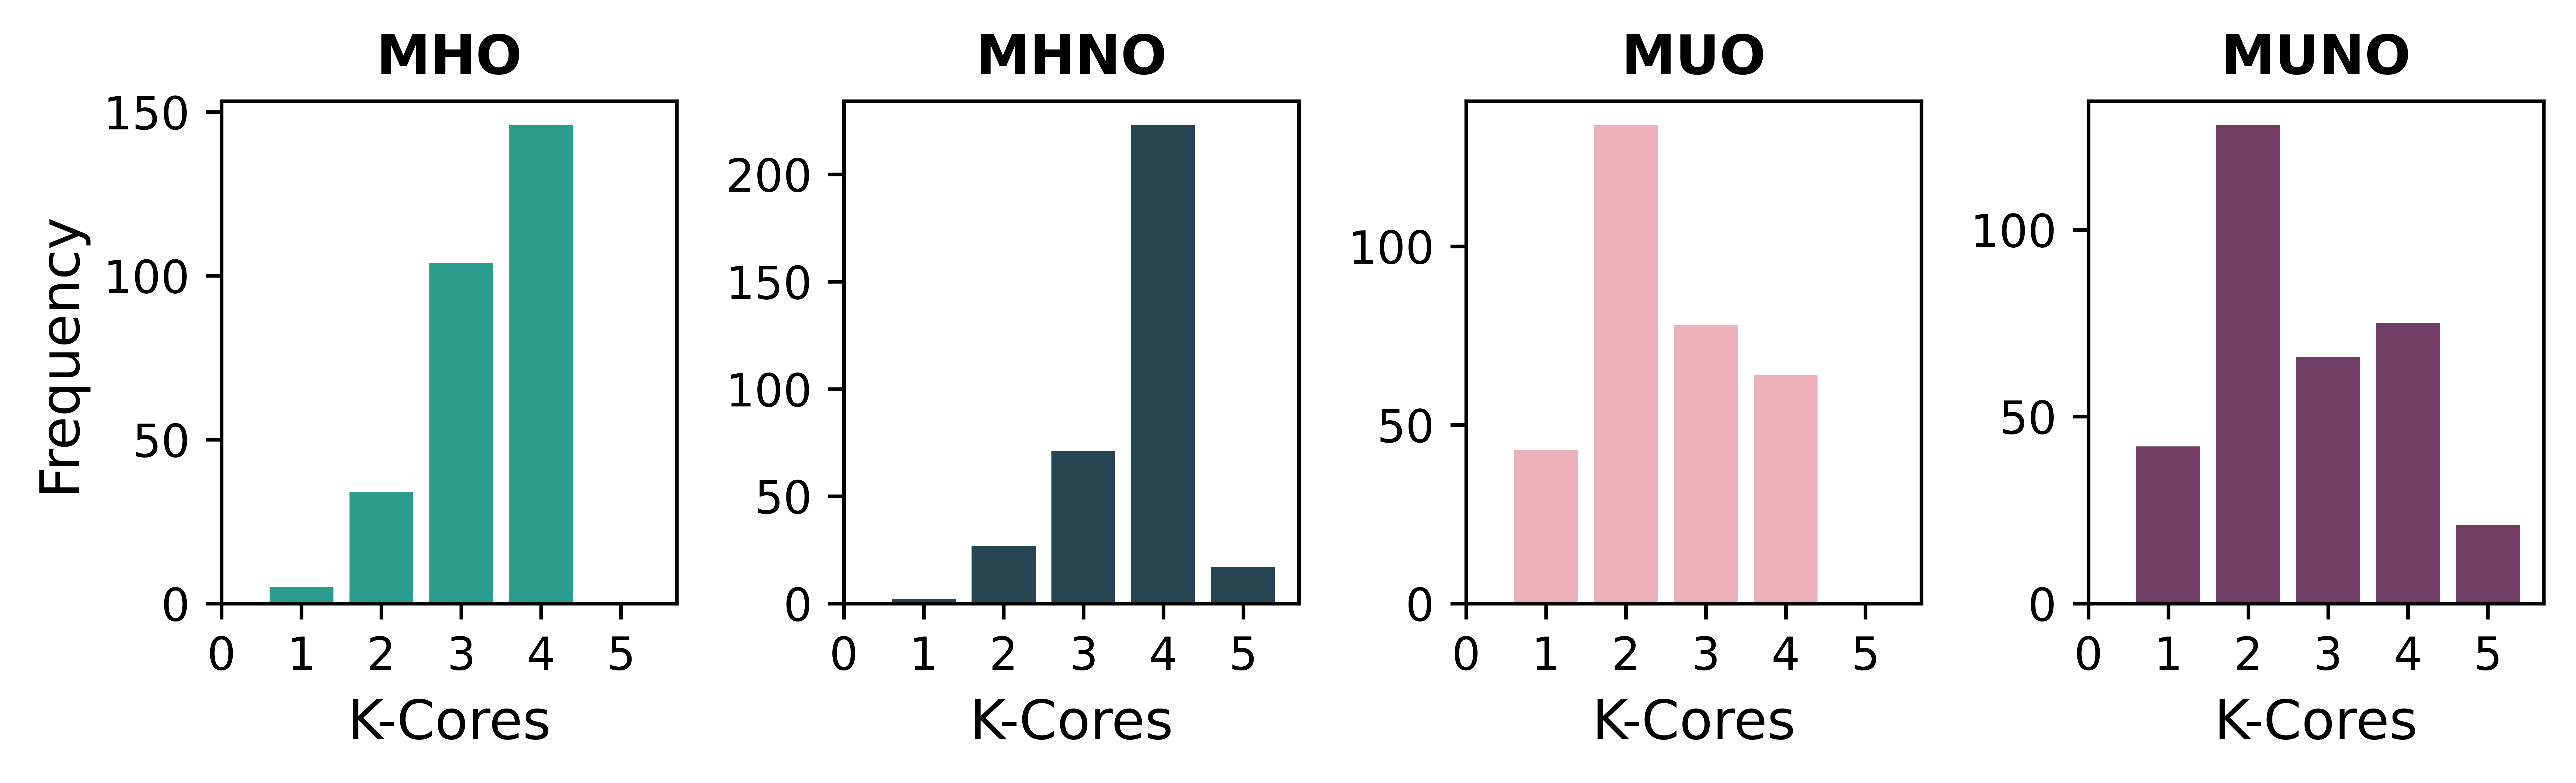

In [ ]:
# Crear una figura con 4 subgráficas en una fila
fig, axes = plt.subplots(1, 4, figsize=(8, 2.5), dpi=1200)

# solucionar rango eje x
xlim = (0, 5.7)

# Subgráfica 1: MHO
frecuencias = Counter(cores_MHO.values())
valores, conteos = zip(*sorted(frecuencias.items(), key=lambda x: x[1], reverse=True))
axes[0].bar(valores, conteos, color=mho_col)
axes[0].set_title("MHO", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].set_xlabel("K-Cores", fontsize=12)
axes[0].set_xticks(range(6))
axes[0].set_xlim(xlim)
axes[0].tick_params(axis="both", which="major", labelsize=10)
axes[0].set_title("MHO", fontsize=12, fontweight='bold')

# Subgráfica 2: MHNO
frecuencias = Counter(cores_MHNO.values())
valores, conteos = zip(*sorted(frecuencias.items(), key=lambda x: x[1], reverse=True))
axes[1].bar(valores, conteos, color=mhno_col)
axes[1].set_title("MHNO", fontsize=12)
axes[1].set_xlabel("K-Cores", fontsize=12)
axes[1].set_xticks(range(6))
axes[1].set_xlim(xlim)
axes[1].tick_params(axis="both", which="major", labelsize=10)
axes[1].set_title("MHNO", fontsize=12, fontweight='bold')

# Subgráfica 3: MUO
frecuencias = Counter(cores_MUO.values())
valores, conteos = zip(*sorted(frecuencias.items(), key=lambda x: x[1], reverse=True))
axes[2].bar(valores, conteos, color=muo_col)
axes[2].set_title("MUO", fontsize=12)
axes[2].set_xlabel("K-Cores", fontsize=12)
axes[2].set_xticks(range(6))
axes[2].set_xlim(xlim)
axes[2].tick_params(axis="both", which="major", labelsize=10)
axes[2].set_title("MUO", fontsize=12, fontweight='bold')

# Subgráfica 4: MUNO
frecuencias = Counter(cores_MUNO.values())
valores, conteos = zip(*sorted(frecuencias.items(), key=lambda x: x[1], reverse=True))
axes[3].bar(valores, conteos, color=muno_col)
axes[3].set_title("MUNO", fontsize=12)
axes[3].set_xlabel("K-Cores", fontsize=12)
axes[3].set_xticks(range(6))
axes[3].set_xlim(xlim)
axes[3].tick_params(axis="both", which="major", labelsize=10)
axes[3].set_title("MUNO", fontsize=12, fontweight='bold')

# Ajustar diseño para evitar solapamientos
plt.tight_layout()


# Guardar figura


# Mostrar figura
plt.show()


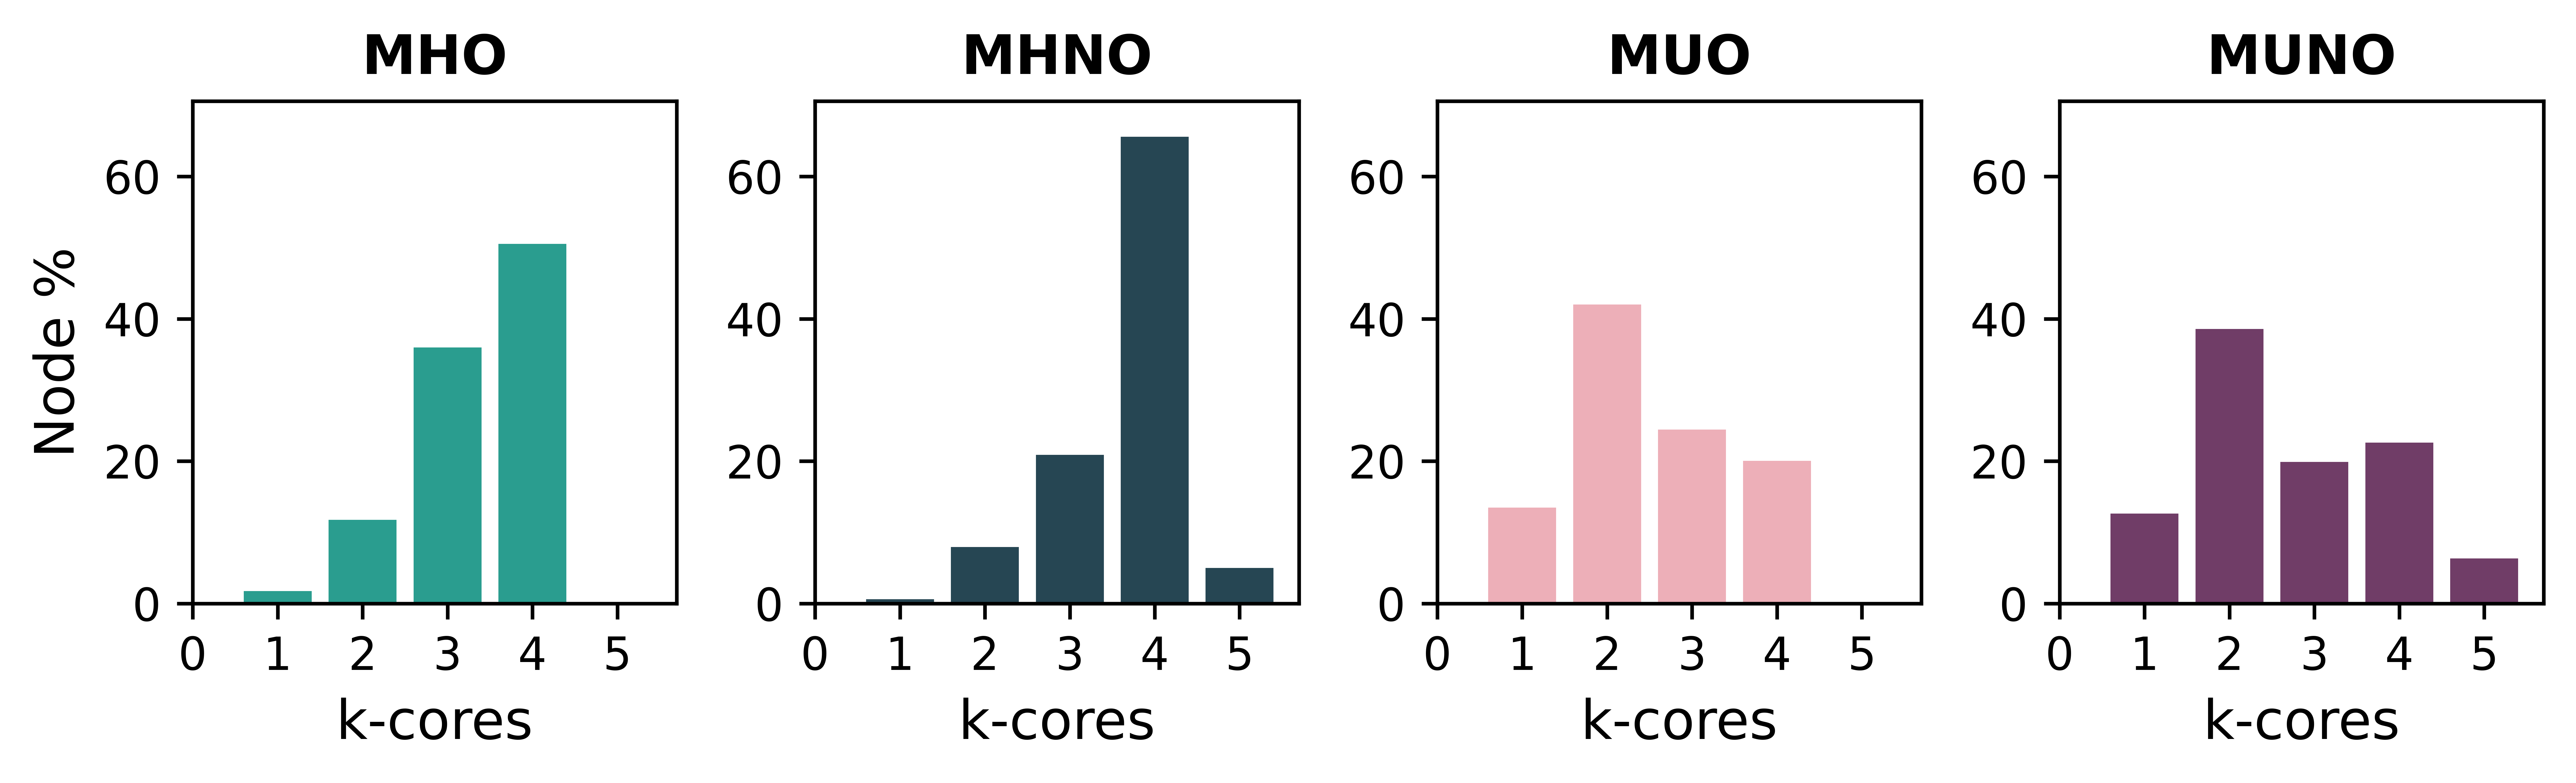

In [ ]:
# Crear una figura con 4 subgráficas en una fila
fig, axes = plt.subplots(1, 4, figsize=(8, 2.5), dpi=1200)

# Definir el rango del eje x (de 0 a 5, inclusive)
xlim = (0, 5.7)

# Subgráfica 1: MHO
frecuencias = Counter(cores_MHO.values())
valores, conteos = zip(*sorted(frecuencias.items(), key=lambda x: x[1], reverse=True))

# Calcular el porcentaje sobre el total
total = sum(conteos)
porcentajes = [c / total * 100 for c in conteos]

axes[0].bar(valores, porcentajes, color=mho_col)
axes[0].set_title("MHO", fontsize=12, fontweight='bold')
axes[0].set_ylabel("Node %", fontsize=12)
axes[0].set_xlabel("k-cores", fontsize=12)
axes[0].set_xticks(range(6))
axes[0].set_xlim(xlim)  # Establecer el mismo límite en el eje X
axes[0].tick_params(axis="both", which="major", labelsize=10)

# Subgráfica 2: MHNO
frecuencias = Counter(cores_MHNO.values())
valores, conteos = zip(*sorted(frecuencias.items(), key=lambda x: x[1], reverse=True))

# Calcular el porcentaje sobre el total
total = sum(conteos)
porcentajes = [c / total * 100 for c in conteos]

axes[1].bar(valores, porcentajes, color=mhno_col)
axes[1].set_title("MHNO", fontsize=12, fontweight='bold')
axes[1].set_xticks(range(6))
axes[1].set_xlim(xlim)  # Establecer el mismo límite en el eje X
axes[1].tick_params(axis="both", which="major", labelsize=10)
axes[1].set_xlabel("k-cores", fontsize=12)
max_y_value = max(porcentajes ) + 5

# Subgráfica 3: MUO
frecuencias = Counter(cores_MUO.values())
valores, conteos = zip(*sorted(frecuencias.items(), key=lambda x: x[1], reverse=True))

# Calcular el porcentaje sobre el total
total = sum(conteos)
porcentajes = [c / total * 100 for c in conteos]


axes[2].bar(valores, porcentajes, color=muo_col)
axes[2].set_title("MUO", fontsize=12, fontweight='bold')
axes[2].set_xlabel("k-cores", fontsize=12)
axes[2].set_xticks(range(6))
axes[2].set_xlim(xlim)  # Establecer el mismo límite en el eje X
axes[2].tick_params(axis="both", which="major", labelsize=10)

# Subgráfica 4: MUNO
frecuencias = Counter(cores_MUNO.values())
valores, conteos = zip(*sorted(frecuencias.items(), key=lambda x: x[1], reverse=True))

# Calcular el porcentaje sobre el total
total = sum(conteos)
porcentajes = [c / total * 100 for c in conteos]

axes[3].bar(valores, porcentajes, color=muno_col)
axes[3].set_title("MUNO", fontsize=12, fontweight='bold')
axes[3].set_xlabel("k-cores", fontsize=12)
axes[3].set_xticks(range(6))
axes[3].set_xlim(xlim)  # Establecer el mismo límite en el eje X
axes[3].tick_params(axis="both", which="major", labelsize=10)

# Ajustar diseño para evitar solapamientos
plt.tight_layout()

# Establecer el mismo límite en el eje Y para todas las gráficas
axes[0].set_ylim(0, max_y_value)
axes[1].set_ylim(0, max_y_value)
axes[2].set_ylim(0, max_y_value)
axes[3].set_ylim(0, max_y_value)


plt.savefig("/content/drive/MyDrive/CRCT/MHOxAI4FOOD/MPA3xTODOSxMHO/kcores.png",
            format='png', dpi=1200,
            bbox_inches='tight')

# Mostrar la figura
plt.show()

exportar:

In [ ]:
df = pd.DataFrame(list(cores_MHO.items()), columns=['Node', 'k-core'])
df.to_csv('/content/drive/MyDrive/CRCT/MHOxAI4FOOD/MPA3xTODOSxMHO/networkFiles/MHO_kcores.csv', index=False)

df = pd.DataFrame(list(cores_MHNO.items()), columns=['Node', 'k-core'])
df.to_csv('/content/drive/MyDrive/CRCT/MHOxAI4FOOD/MPA3xTODOSxMHO/networkFiles/MHNO_kcores.csv', index=False)

df = pd.DataFrame(list(cores_MUO.items()), columns=['Node', 'k-core'])
df.to_csv('/content/drive/MyDrive/CRCT/MHOxAI4FOOD/MPA3xTODOSxMHO/networkFiles/MUO_kcores.csv', index=False)

df = pd.DataFrame(list(cores_MUNO.items()), columns=['Node', 'k-core'])
df.to_csv('/content/drive/MyDrive/CRCT/MHOxAI4FOOD/MPA3xTODOSxMHO/networkFiles/MUNO_kcores.csv', index=False)

Para interpretar las diferencias entre los gráficos que representan la **distribución de k-cores** en 4 redes, es útil entender qué es un **k-core** y cómo se relaciona con la estructura de la red:

### ¿Qué es un k-core en redes?
Un **k-core** de una red es una subred donde cada nodo tiene al menos **k conexiones** (grados) con otros nodos dentro de esa subred. Este concepto ayuda a identificar la **robustez** o **cohesión** de una red, ya que nodos en k-cores más altos están más fuertemente interconectados.

### Interpretación de las diferencias en la distribución de k-cores:

1. **Distribución de k-cores centrada en valores bajos (pocos nodos en cores altos)**:
   - **Interpretación**: La red está **poco conectada** o tiene una estructura más dispersa. Los nodos tienden a tener pocas conexiones con otros nodos. Es común en redes donde no hay muchos hubs o puntos centrales de conexión.
   - **Ejemplo**: Redes sociales de usuarios no muy influyentes, redes donde las conexiones entre nodos son débiles o esporádicas.

2. **Distribución de k-cores más equilibrada (cores bajos y altos presentes)**:
   - **Interpretación**: La red tiene una **estructura más diversa**, con algunas partes más densamente conectadas y otras menos. Esto podría reflejar una red con algunos nodos que actúan como hubs y otros que tienen pocas conexiones.
   - **Ejemplo**: Redes sociales donde algunos usuarios son muy influyentes (hubs) y tienen muchas conexiones, mientras que otros usuarios tienen pocas conexiones.

3. **Distribución desplazada hacia valores altos (muchos nodos en cores altos)**:
   - **Interpretación**: La red es **altamente conectada** y cohesionada. Muchos nodos forman parte de cores altos, lo que sugiere que los nodos están fuertemente interconectados, formando comunidades o clústeres densos.
   - **Ejemplo**: Redes de colaboración científica, redes de empresas donde la mayoría de los nodos están fuertemente vinculados a través de relaciones de trabajo o cooperación.

4. **Distribuciones con picos o caídas abruptas**:
   - **Interpretación**: Si la distribución tiene **picos o caídas abruptas**, esto sugiere que la red tiene una estructura heterogénea. Algunas partes pueden estar muy conectadas (cores altos), mientras que otras tienen menos cohesión (cores bajos).
   - **Ejemplo**: Redes con jerarquías o subdivisiones claras, como redes corporativas con grupos de empleados muy conectados, pero con áreas menos conectadas.

### Comparando las redes:

- **Red con mayoría de nodos en k-cores bajos**: Esta red es más dispersa, con muchos nodos que están aislados o débilmente conectados.
- **Red con mayoría de nodos en k-cores altos**: Esta red es mucho más densa y probablemente más resiliente, con nodos altamente interconectados.
- **Red con distribución balanceada**: Hay una diversidad en la red, combinando nodos débilmente conectados con comunidades muy cohesivas.
- **Red con picos o variaciones**: Puede haber diferentes subestructuras o comunidades con diferentes niveles de cohesión.

### Conclusión:
Las diferencias entre los gráficos de k-cores te indican la **estructura interna** de cada red. Redes con k-cores más altos tienden a ser más **robustas** y **cohesionadas**, mientras que redes con k-cores más bajos pueden ser más **vulnerables** o estar menos organizadas en comunidades densas.

La interpretación de cada red depende de cómo se comporten los nodos dentro de los diferentes cores y qué estructura prevalezca (alta cohesión, dispersión, o una mezcla de ambas).

# Abundancia y Betweenness vs. Grado

In [ ]:
redes = [MHO, MHNO, MUO, MUNO]
# Colores y etiquetas para cada red
colores = [mho_col, mhno_col, muo_col, muno_col]
etiquetas = ['MHO', 'MHNO', 'MUO', 'MUNO']

In [ ]:
def dividir_en_grupos(G, num_grupos=4):
    abundancias = np.array([G.nodes[n]['Abundance'] for n in G.nodes()])
    cortes = np.percentile(abundancias, np.linspace(0, 100, num_grupos + 1))
    grupos = []
    for i in range(num_grupos):
        grupo = [n for n in G.nodes() if cortes[i] <= G.nodes[n]['Abundance'] < cortes[i + 1]]
        grupos.append(grupo)
    return grupos

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.1% of the points cannot be placed; y

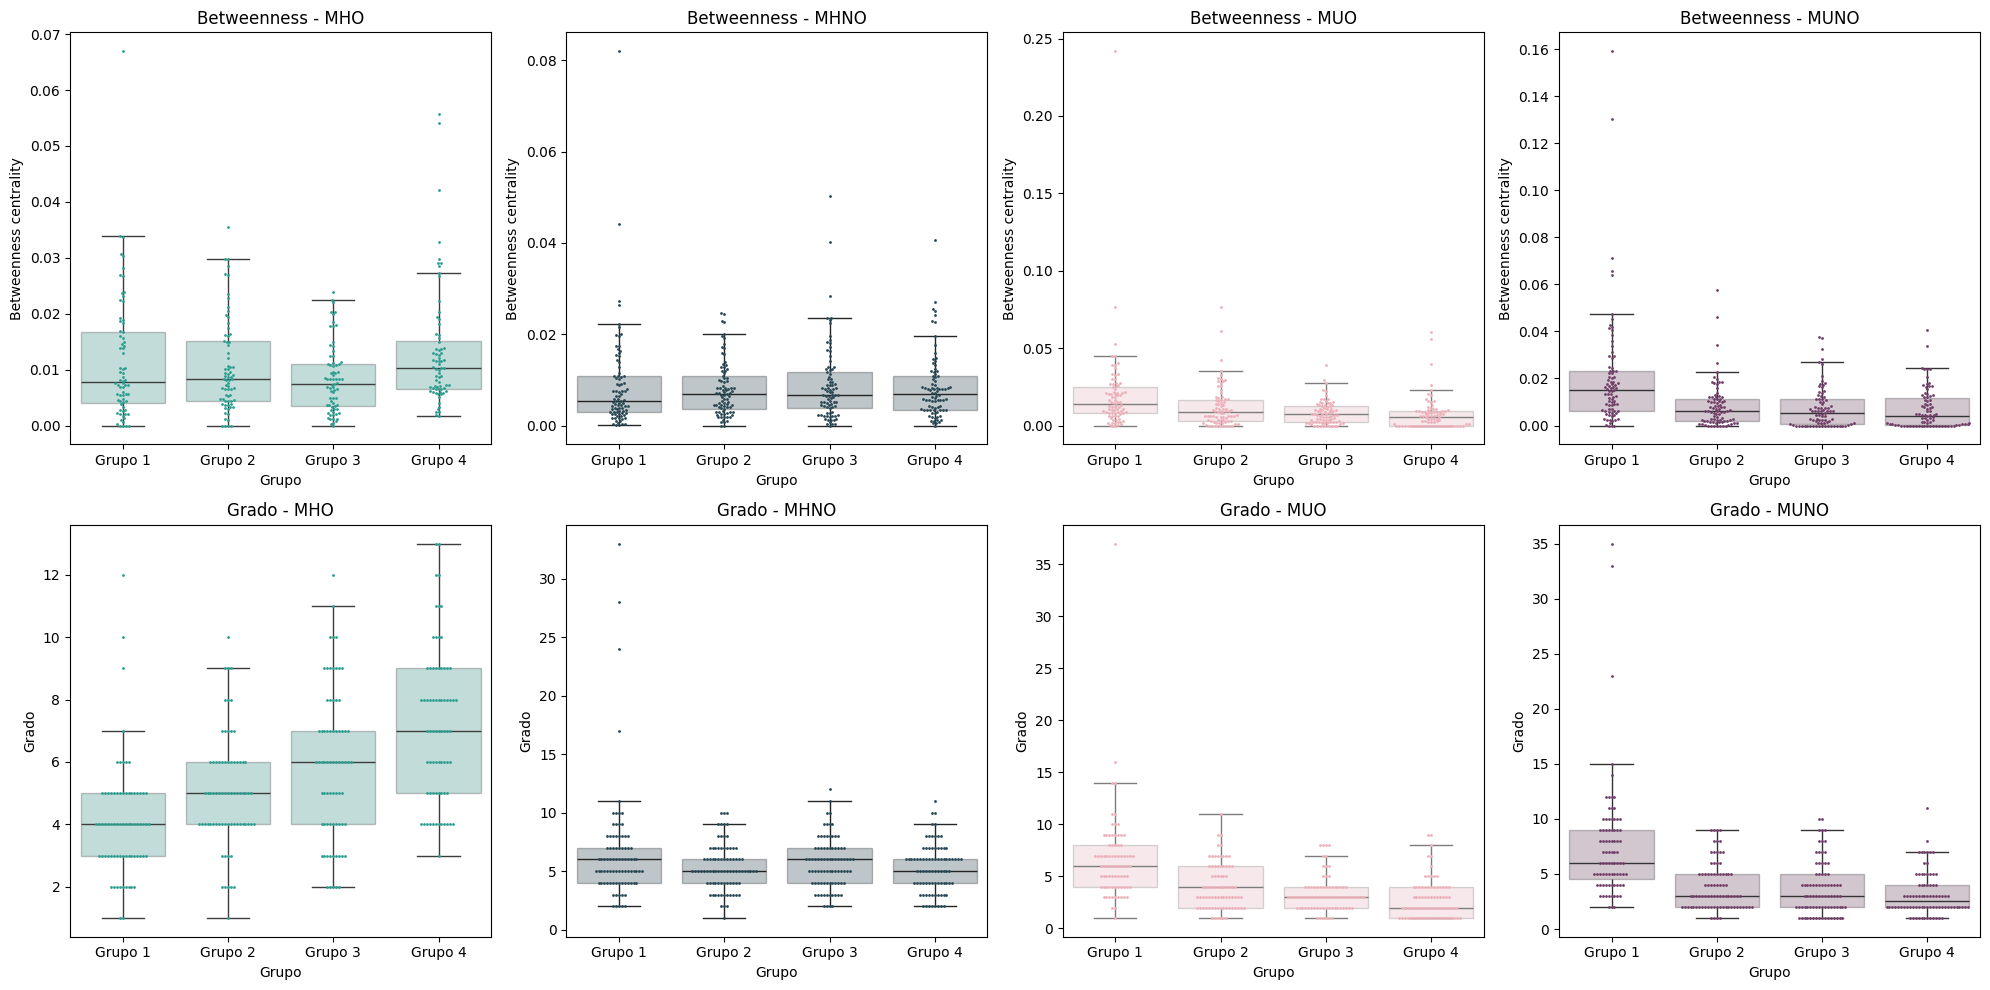

In [ ]:
# Crear la figura con dos filas: una para betweenness y otra para grado
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Iterar sobre las redes para generar los swarm plots
for i, G in enumerate(redes):
    # Calcular betweenness centrality y grado para cada nodo
    betweenness = nx.betweenness_centrality(G)
    grados = dict(G.degree())

    # Dividir nodos en 4 grupos según su abundancia
    grupos = dividir_en_grupos(G, num_grupos=4)

    # Crear listas para almacenar los valores de betweenness y grado en cada grupo
    betweenness_grupos = [[betweenness[n] for n in grupo] for grupo in grupos]
    grados_grupos = [[grados[n] for n in grupo] for grupo in grupos]

    # Preparar DataFrames para Seaborn
    df_betweenness = pd.DataFrame({
        'Betweenness': [b for grupo in betweenness_grupos for b in grupo],
        'Grupo': [f'Grupo {j+1}' for j in range(4) for _ in betweenness_grupos[j]]
    })

    df_grados = pd.DataFrame({
        'Grado': [g for grupo in grados_grupos for g in grupo],
        'Grupo': [f'Grupo {j+1}' for j in range(4) for _ in grados_grupos[j]]
    })

    # Boxplot para Betweenness en el subplot superior
    sns.boxplot(data=df_betweenness, x='Grupo', y='Betweenness', ax=axs[0, i], color=colores[i], boxprops=dict(alpha=.3), showfliers=False)

    # Swarm plot para Betweenness en el subplot superior
    sns.swarmplot(data=df_betweenness, x='Grupo', y='Betweenness', ax=axs[0, i], color=colores[i], size=2)
    axs[0, i].set_title(f'Betweenness - {etiquetas[i]}')
    axs[0, i].set_ylabel('Betweenness centrality')

    # Boxplot para Grado en el subplot inferior
    sns.boxplot(data=df_grados, x='Grupo', y='Grado', ax=axs[1, i], color=colores[i], boxprops=dict(alpha=.3), showfliers=False)

    # Swarm plot para Grado en el subplot inferior
    sns.swarmplot(data=df_grados, x='Grupo', y='Grado', ax=axs[1, i], color=colores[i], size=2)
    axs[1, i].set_title(f'Grado - {etiquetas[i]}')
    axs[1, i].set_ylabel('Grado')

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 18.8% of the points cannot be place

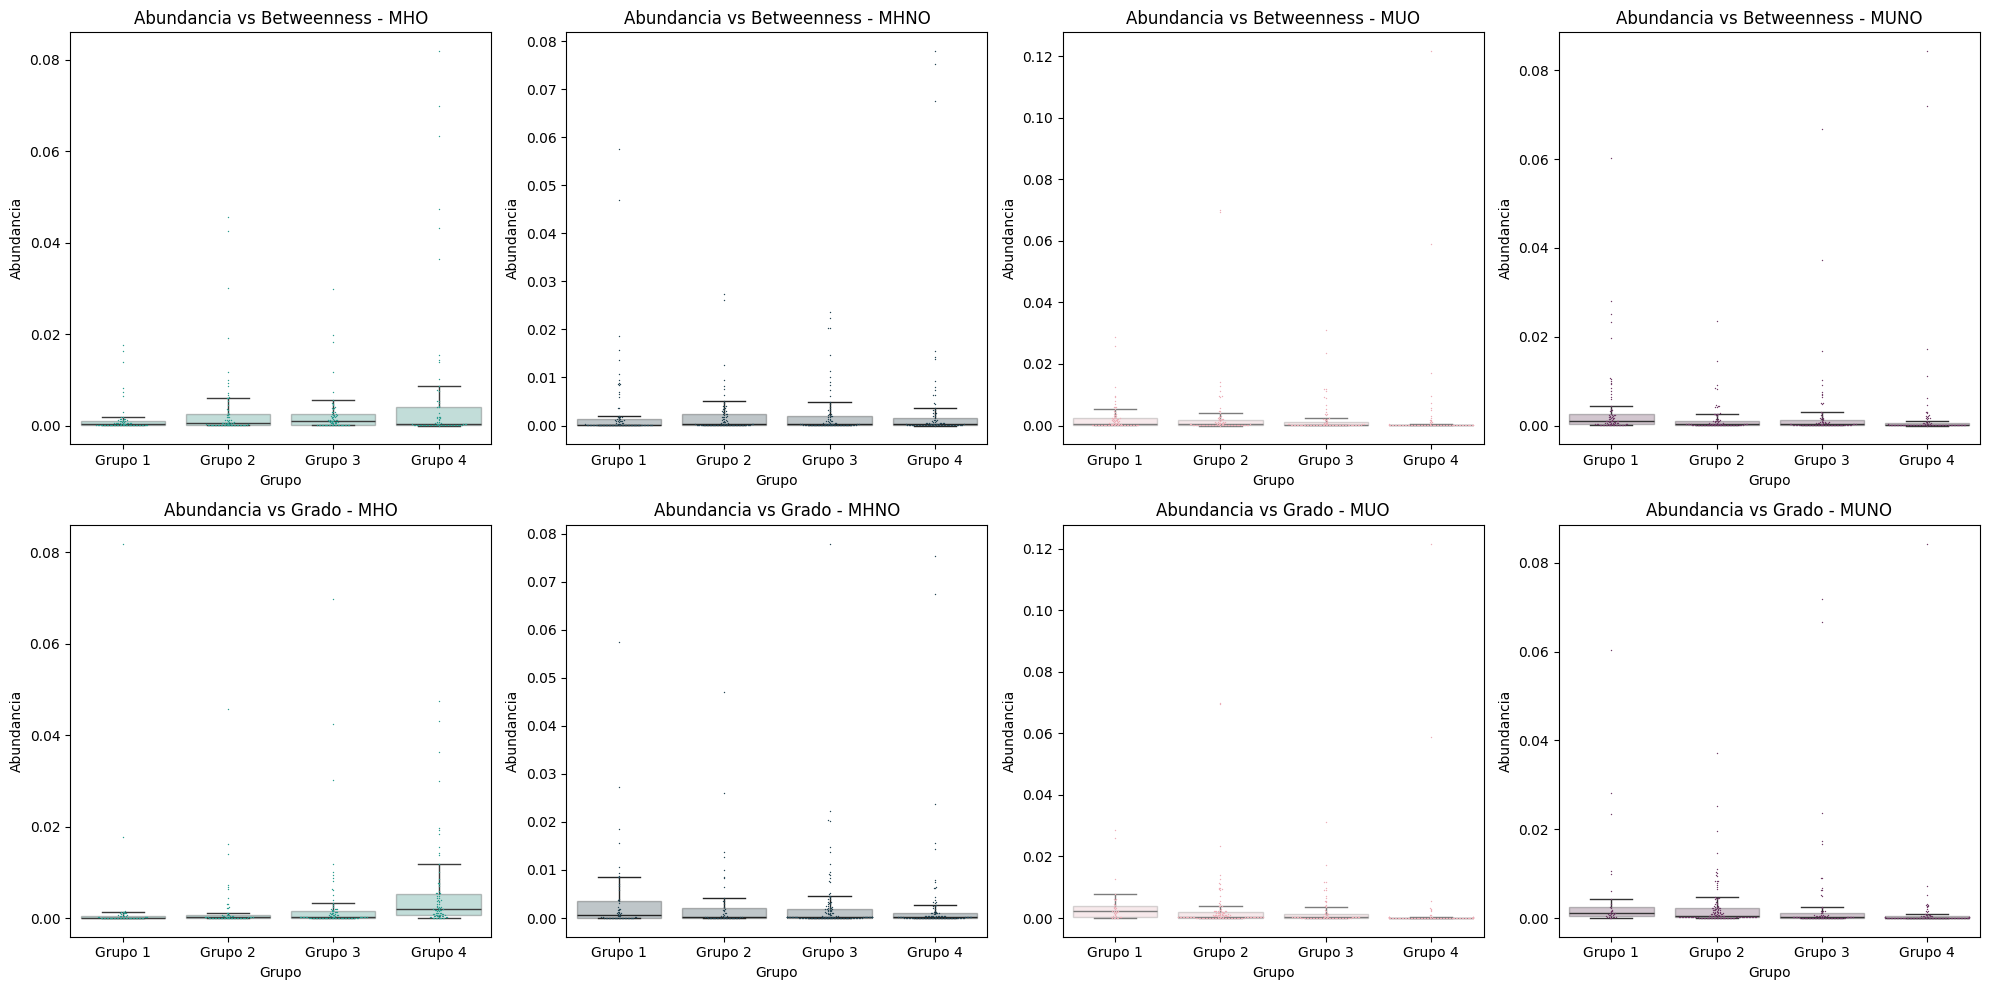

In [ ]:

# Función para dividir nodos en grupos según sus valores
def dividir_en_grupos(valores, num_grupos=4):
    cortes = np.percentile(valores, np.linspace(0, 100, num_grupos + 1))
    grupos = []
    for i in range(num_grupos):
        grupo = [j for j in range(len(valores)) if cortes[i] <= valores[j] < cortes[i + 1]]
        grupos.append(grupo)
    return grupos

# Crear la figura con dos filas: una para grado y otra para betweenness
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Iterar sobre las redes para generar los boxplots y swarm plots
for i, G in enumerate([MHO, MHNO, MUO, MUNO]):
    # Calcular betweenness centrality y grado para cada nodo
    betweenness = nx.betweenness_centrality(G)
    grados = dict(G.degree())

    # Obtener las abundancias
    abundancias = np.array([G.nodes[n]['Abundance'] for n in G.nodes()])

    # Dividir nodos en grupos según betweenness y grado
    grupos_betweenness = dividir_en_grupos(list(betweenness.values()), num_grupos=4)
    grupos_grado = dividir_en_grupos(list(grados.values()), num_grupos=4)

    # Preparar DataFrames para Seaborn (usando betweenness)
    df_betweenness = pd.DataFrame({
        'Abundancia': [abundancias[j] for grupo in grupos_betweenness for j in grupo],
        'Grupo': [f'Grupo {i+1}' for i in range(4) for _ in grupos_betweenness[i]]
    })

    # Preparar DataFrames para Seaborn (usando grado)
    df_grados = pd.DataFrame({
        'Abundancia': [abundancias[j] for grupo in grupos_grado for j in grupo],
        'Grupo': [f'Grupo {i+1}' for i in range(4) for _ in grupos_grado[i]]
    })

    # Boxplot para Abundancia según Betweenness en el subplot superior
    sns.boxplot(data=df_betweenness, x='Grupo', y='Abundancia', ax=axs[0, i], color=colores[i], boxprops=dict(alpha=.3), showfliers=False)

    # Swarm plot para Abundancia según Betweenness en el subplot superior
    sns.swarmplot(data=df_betweenness, x='Grupo', y='Abundancia', ax=axs[0, i], color=colores[i], size=1)
    axs[0, i].set_title(f'Abundancia vs Betweenness - {etiquetas[i]}')
    axs[0, i].set_ylabel('Abundancia')

    # Boxplot para Abundancia según Grado en el subplot inferior
    sns.boxplot(data=df_grados, x='Grupo', y='Abundancia', ax=axs[1, i], color=colores[i], boxprops=dict(alpha=.3), showfliers=False)

    # Swarm plot para Abundancia según Grado en el subplot inferior
    sns.swarmplot(data=df_grados, x='Grupo', y='Abundancia', ax=axs[1, i], color=colores[i], size=1)
    axs[1, i].set_title(f'Abundancia vs Grado - {etiquetas[i]}')
    axs[1, i].set_ylabel('Abundancia')

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()


# Visualización Abundancia X Grado

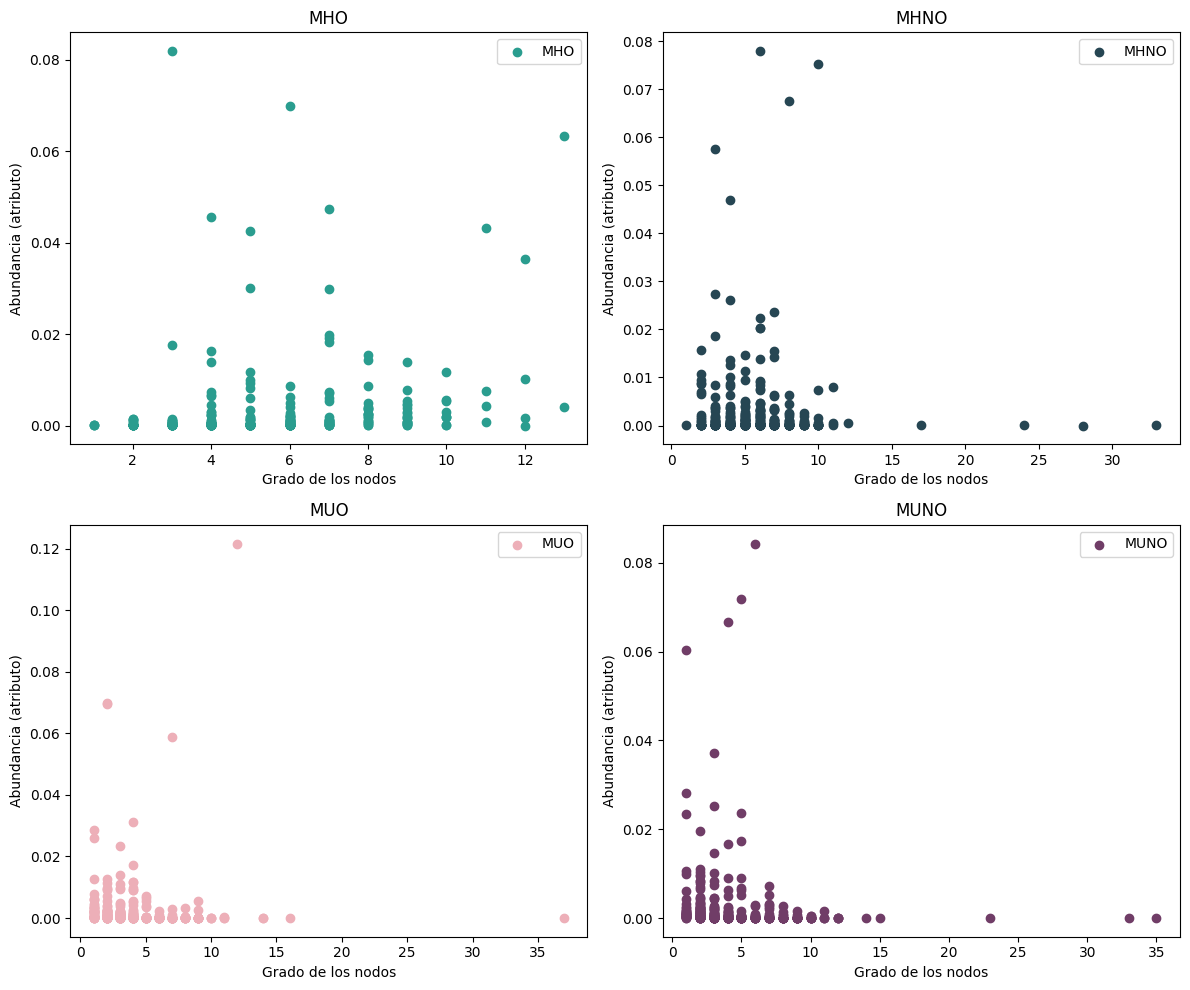

In [ ]:
# Crear la figura y definir 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Iterar sobre las redes para generar los subplots
for i, G in enumerate(redes):
    # Extraer el grado y el atributo 'Abundancia' de cada nodo
    grados = [G.degree(n) for n in G.nodes()]
    abundancias = [G.nodes[n]['Abundance'] for n in G.nodes()]

    # Subplot correspondiente
    ax = axs[i//2, i%2]

    # Graficar en el subplot: grado en X, Abundancia en Y
    ax.scatter(grados, abundancias, color=colores[i], label=etiquetas[i])

    # Etiquetas para cada subplot
    ax.set_xlabel('Grado de los nodos')
    ax.set_ylabel('Abundancia (atributo)')
    ax.set_title(etiquetas[i])
    ax.legend()

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()


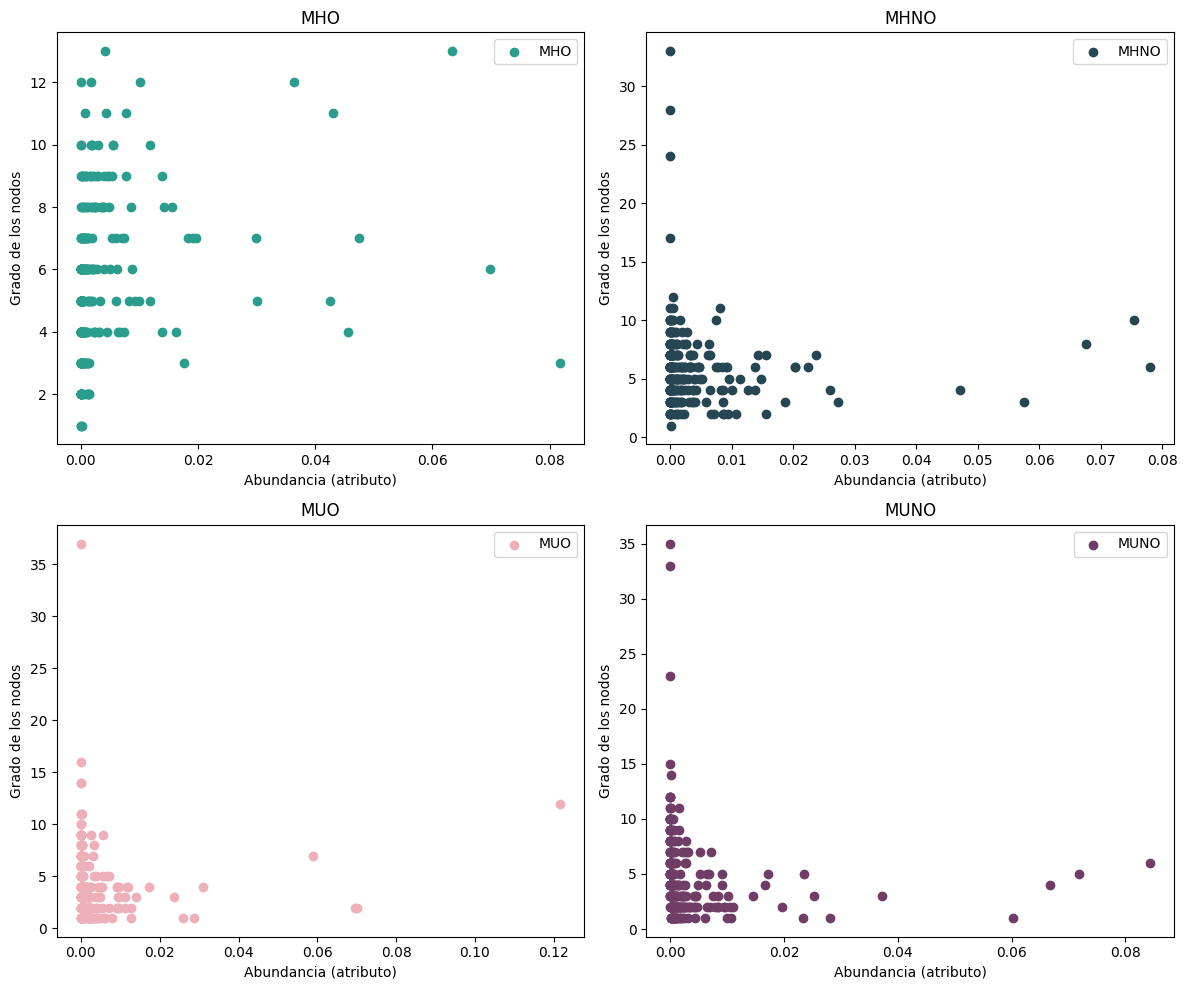

In [ ]:
# Crear la figura y definir 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Iterar sobre las redes para generar los subplots
for i, G in enumerate(redes):
    # Extraer el grado y el atributo 'Abundancia' de cada nodo
    grados = [G.degree(n) for n in G.nodes()]
    abundancias = [G.nodes[n]['Abundance'] for n in G.nodes()]

    # Subplot correspondiente
    ax = axs[i//2, i%2]

    # Graficar en el subplot: grado en X, Abundancia en Y
    ax.scatter(abundancias, grados, color=colores[i], label=etiquetas[i])

    # Etiquetas para cada subplot
    ax.set_ylabel('Grado de los nodos')
    ax.set_xlabel('Abundancia (atributo)')
    ax.set_title(etiquetas[i])
    ax.legend()

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()


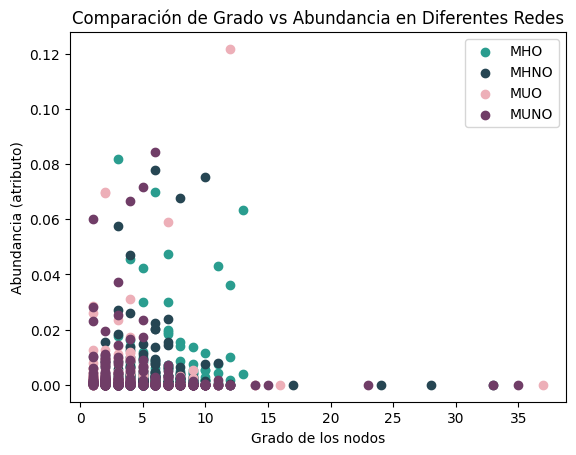

In [ ]:
# Iterar sobre las redes para agregar todos los puntos en la misma gráfica
for i, G in enumerate(redes):
    # Extraer el grado y el atributo 'Abundancia' de cada nodo
    grados = [G.degree(n) for n in G.nodes()]
    abundancias = [G.nodes[n]['Abundance'] for n in G.nodes()]

    # Graficar en la misma figura: grado en X, Abundancia en Y, con color diferente
    plt.scatter(grados, abundancias, color=colores[i], label=etiquetas[i])

# Etiquetas para el gráfico
plt.xlabel('Grado de los nodos')
plt.ylabel('Abundancia (atributo)')
plt.title('Comparación de Grado vs Abundancia en Diferentes Redes')

# Mostrar leyenda para diferenciar las redes
plt.legend()

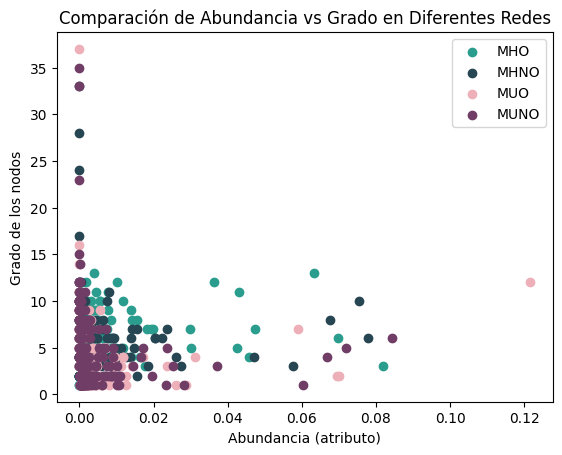

In [ ]:

# Iterar sobre las redes para agregar todos los puntos en la misma gráfica
for i, G in enumerate(redes):
    # Extraer el grado y el atributo 'Abundancia' de cada nodo
    grados = [G.degree(n) for n in G.nodes()]
    abundancias = [G.nodes[n]['Abundance'] for n in G.nodes()]

    # Graficar en la misma figura: abundancia en X, grado en Y, con color diferente
    plt.scatter(abundancias, grados, color=colores[i], label=etiquetas[i])

# Etiquetas para el gráfico
plt.xlabel('Abundancia (atributo)')
plt.ylabel('Grado de los nodos')
plt.title('Comparación de Abundancia vs Grado en Diferentes Redes')

# Mostrar leyenda para diferenciar las redes
plt.legend()

# Mostrar la gráfica
plt.show()

# Abundancia X Betweenness

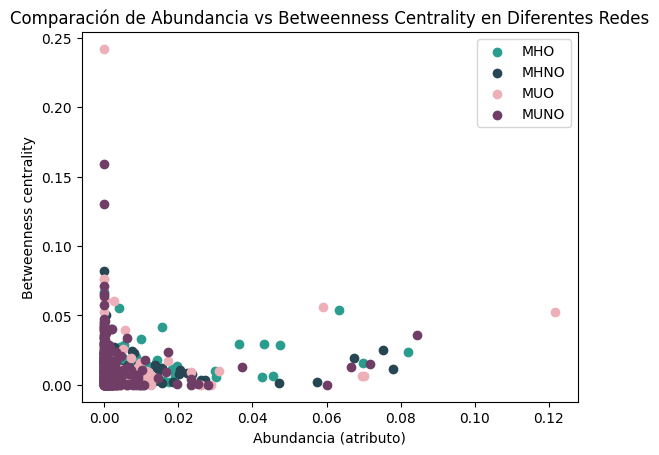

In [ ]:

# Iterar sobre las redes para agregar todos los puntos en la misma gráfica
for i, G in enumerate(redes):
    # Calcular betweenness centrality para cada red
    betweenness = nx.betweenness_centrality(G)

    # Extraer betweenness y el atributo 'Abundancia' de cada nodo
    betweenness_vals = [betweenness[n] for n in G.nodes()]
    abundancias = [G.nodes[n]['Abundance'] for n in G.nodes()]

    # Graficar en la misma figura: abundancia en X, betweenness en Y, con color diferente
    plt.scatter(abundancias, betweenness_vals, color=colores[i], label=etiquetas[i])

# Etiquetas para el gráfico
plt.xlabel('Abundancia (atributo)')
plt.ylabel('Betweenness centrality')
plt.title('Comparación de Abundancia vs Betweenness Centrality en Diferentes Redes')

# Mostrar leyenda para diferenciar las redes
plt.legend()

# Mostrar la gráfica
plt.show()

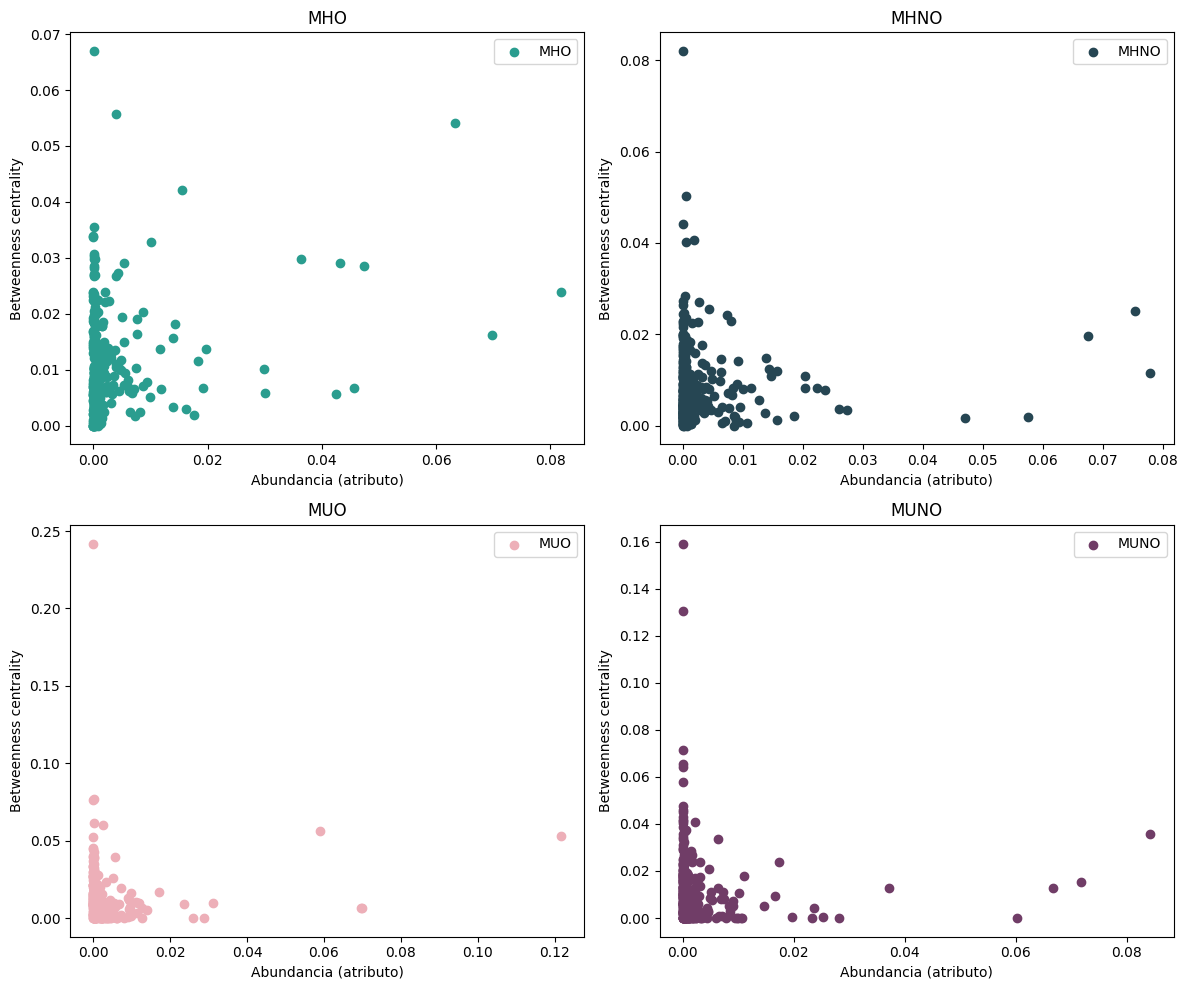

In [ ]:

# Crear la figura y definir 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Iterar sobre las redes para generar los subplots
for i, G in enumerate(redes):
    # Calcular betweenness centrality para cada red
    betweenness = nx.betweenness_centrality(G)

    # Extraer betweenness y el atributo 'Abundancia' de cada nodo
    betweenness_vals = [betweenness[n] for n in G.nodes()]
    abundancias = [G.nodes[n]['Abundance'] for n in G.nodes()]

    # Subplot correspondiente
    ax = axs[i//2, i%2]

    # Graficar en el subplot: abundancia en X, betweenness en Y
    ax.scatter(abundancias, betweenness_vals, color=colores[i], label=etiquetas[i])

    # Etiquetas para cada subplot
    ax.set_xlabel('Abundancia (atributo)')
    ax.set_ylabel('Betweenness centrality')
    ax.set_title(etiquetas[i])
    ax.legend()

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()


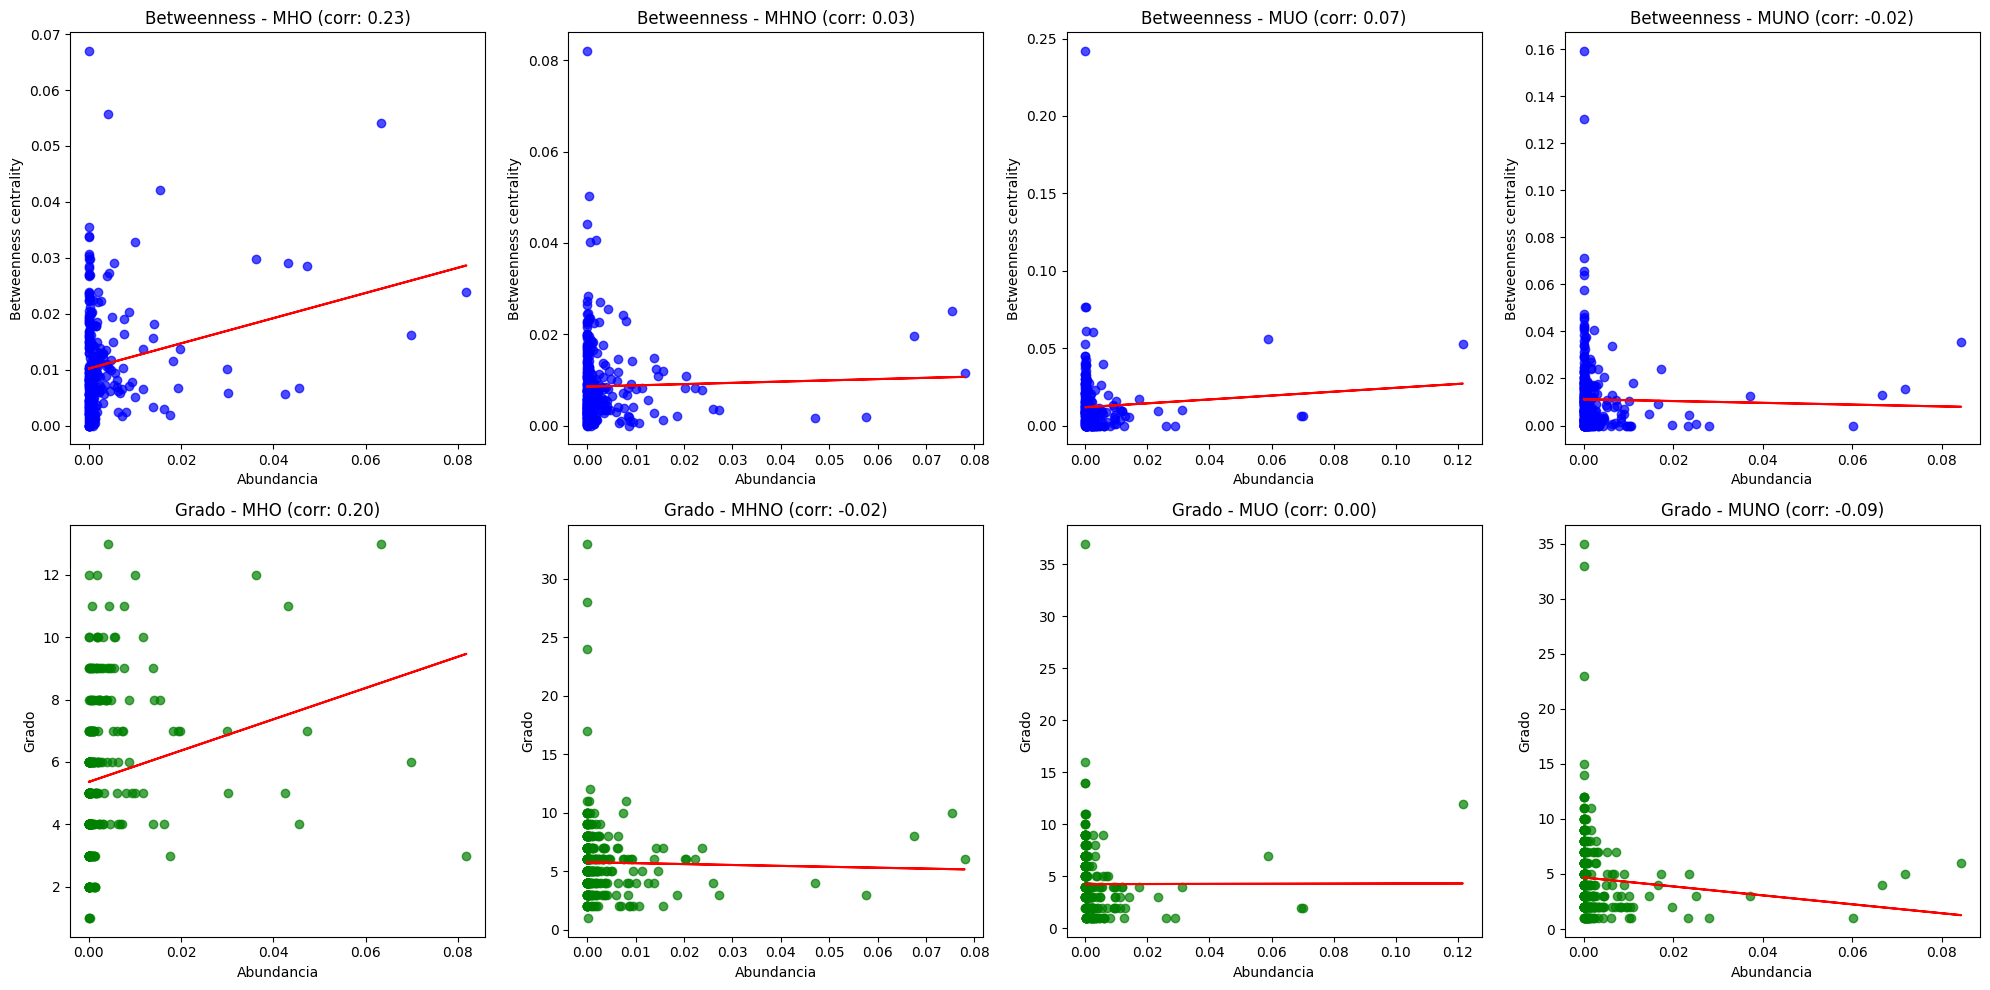

In [ ]:


# Crear la figura con dos subplots: uno para betweenness y otro para grado
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Iterar sobre las redes para generar los plots
for i, G in enumerate(redes):
    # Calcular betweenness centrality y grado para cada nodo
    betweenness = nx.betweenness_centrality(G)
    grados = dict(G.degree())

    # Obtener los valores de Abundancia, betweenness y grado
    abundancias = np.array([G.nodes[n]['Abundance'] for n in G.nodes()])
    betweenness_vals = np.array([betweenness[n] for n in G.nodes()])
    grados_vals = np.array([grados[n] for n in G.nodes()])

    # Calcular la correlación
    corr_betweenness = np.corrcoef(abundancias, betweenness_vals)[0, 1]
    corr_grados = np.corrcoef(abundancias, grados_vals)[0, 1]

    # Scatter plot para Betweenness
    axs[0, i].scatter(abundancias, betweenness_vals, color='blue', alpha=0.7)

    # Ajustar línea de tendencia
    p = np.polyfit(abundancias, betweenness_vals, 1)  # Ajustar línea de regresión
    axs[0, i].plot(abundancias, np.polyval(p, abundancias), color='red')  # Línea de tendencia

    # Etiquetas para el scatter plot de betweenness
    axs[0, i].set_title(f'Betweenness - {etiquetas[i]} (corr: {corr_betweenness:.2f})')
    axs[0, i].set_xlabel('Abundancia')
    axs[0, i].set_ylabel('Betweenness centrality')

    # Scatter plot para Grado
    axs[1, i].scatter(abundancias, grados_vals, color='green', alpha=0.7)

    # Ajustar línea de tendencia
    p_grado = np.polyfit(abundancias, grados_vals, 1)  # Ajustar línea de regresión
    axs[1, i].plot(abundancias, np.polyval(p_grado, abundancias), color='red')  # Línea de tendencia

    # Etiquetas para el scatter plot de grado
    axs[1, i].set_title(f'Grado - {etiquetas[i]} (corr: {corr_grados:.2f})')
    axs[1, i].set_xlabel('Abundancia')
    axs[1, i].set_ylabel('Grado')

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()
